- Module 4 Project
- Eric Sundstrom
- Instructor: Victor Geislinger

# Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

- read in data from csv file
- check to make sure things look correct

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2

- rename RegionName to ZipCode because that is what the data really is
- drop the RegionID columns as it is confusing to what it represents

In [3]:
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)
df.drop('RegionID', axis=1, inplace=True)

- helper function to transform the given column strings to datetime format
- use the helper function

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[6:], format='%Y-%m')

In [5]:
df.columns.values[6:] = get_datetimes(df)
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 3

## Reasons to invest in a zipcode for housing

- Long-term growth
- Short-term growth
- Recession proof

## Diversity in investments is important

----------------------------------------------------------------------------------------------------------------------

- Make column for total pct. change of house prices (to gauge long-term performance)

In [6]:
df['total_pct_change'] = (df[df.columns[-1]] - df[df.columns[6]])/df[df.columns[6]]*100

- Move new column from end to beginning so all time series data stay together

In [7]:
col = df.pop('total_pct_change') 
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed from 1996 to 2018

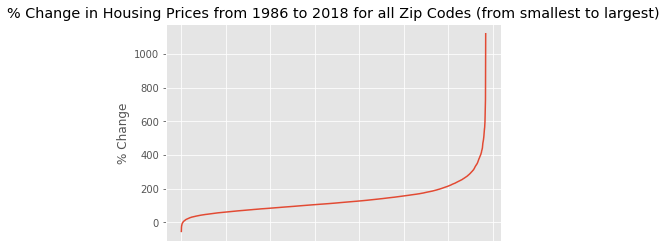

In [8]:
plt.plot(range(len(df)),df['total_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change')
plt.title('% Change in Housing Prices from 1986 to 2018 for all Zip Codes (from smallest to largest)')
plt.show()

- Identify column that is 5 years from last time series data point (2018-04-01)
- Make new columns for 5 year pct change (to gauge short-term performance)

In [9]:
df.columns[211]

Timestamp('2013-04-01 00:00:00')

In [10]:
df['5_year_pct_change'] = (df[df.columns[-1]] - df[df.columns[211]])/df[df.columns[211]]*100

- Move new column from end to beginning so all time series data stay together

In [11]:
col = df.pop('5_year_pct_change')
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed from 2013 to 2018

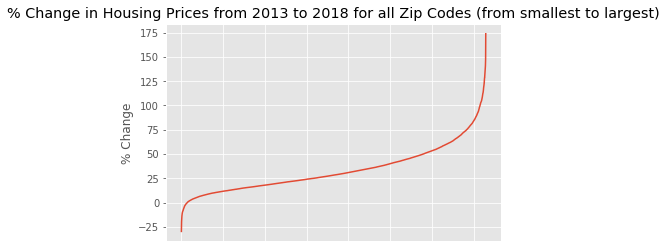

In [12]:
plt.plot(range(len(df)),df['5_year_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change')
plt.title('% Change in Housing Prices from 2013 to 2018 for all Zip Codes (from smallest to largest)')
plt.show()

- Identify columns that mark beginning and end of major economic recession that heavily effected the housing market as a whole
- Make new column that measures pct change over the period of economic rececssion (to gauge volatility)

In [13]:
df.columns[148], df.columns[196]

(Timestamp('2007-12-01 00:00:00'), Timestamp('2011-12-01 00:00:00'))

In [14]:
df['recession_pct_change'] = (df[df.columns[196]] - df[df.columns[148]])/df[df.columns[148]]*100

- Move new column from end to beginning so all time series data stay together

In [15]:
col = df.pop('recession_pct_change') 
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed during the recession

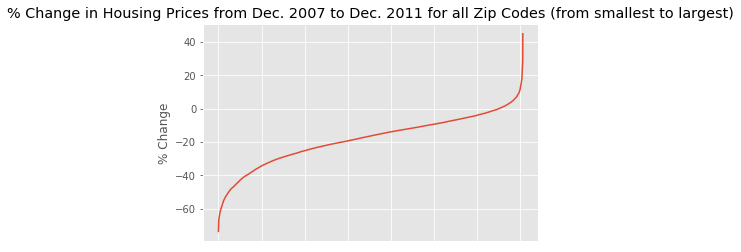

In [16]:
plt.plot(range(len(df)),df['recession_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change')
plt.title('% Change in Housing Prices from Dec. 2007 to Dec. 2011 for all Zip Codes (from smallest to largest)')
plt.show()

- Let's find the zipcodes with the best mix of success of our 3 new metrics 
- Are any in the top 5% of all 3 categories?

In [17]:
df[df.columns[5:8]].describe(percentiles=[.25,.5,.75,.9,.95])

,recession_pct_change,5_year_pct_change,total_pct_change
count,14110.000000,14572.000000,13684.000000
mean,-18.320535,33.657962,132.560521
std,14.901618,23.750621,86.601907
min,-73.749264,-29.672650,-53.260870
25%,-27.049009,16.898228,78.569073
50%,-16.420497,28.313301,113.948445
75%,-7.901792,45.467508,161.983287
90%,-1.347881,65.621376,233.585887
95%,2.573716,79.656663,292.739561
max,44.987775,173.872951,1118.993994


In [18]:
df.loc[(df['recession_pct_change']>2.5) & (df['5_year_pct_change']>79) & (df['total_pct_change']>292)]

,ZipCode,City,State,Metro,CountyName,recession_pct_change,5_year_pct_change,total_pct_change,SizeRank,1996-04-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
117,11211,New York,NY,New York,Kings,6.406859,106.867117,1118.993994,118,133200.0,...,1405100,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700
1155,11222,New York,NY,New York,Kings,10.828025,118.247527,1053.552279,1156,149200.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
1773,2139,Cambridge,MA,Boston,Middlesex,3.778832,97.799686,551.482353,1774,212500.0,...,1234700,1248100,1259200,1278600,1303600,1325000,1342600,1369600,1386300,1384400
2054,94303,Palo Alto,CA,San Jose,Santa Clara,5.802239,86.118864,630.403420,2055,374300.0,...,2416900,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900
3325,15213,Pittsburgh,PA,Pittsburgh,Allegheny,3.624009,113.265306,356.553398,3326,41200.0,...,173900,175400,177500,181000,184600,186700,188000,188900,189000,188100
6160,2141,Cambridge,MA,Boston,Middlesex,3.580388,98.038038,553.368560,6161,151400.0,...,887800,896800,905900,917700,931300,941100,951200,966000,981500,989200
6563,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6.156156,147.593583,438.372093,6564,34400.0,...,162300,164400,166100,167600,169000,170400,171400,173900,179700,185200
7500,2120,Boston,MA,Boston,Suffolk,4.311985,98.483146,702.954545,7501,88000.0,...,659200,669000,672500,680500,689100,696200,697000,704500,710400,706600
8350,78721,Austin,TX,Austin,Travis,2.993585,104.488950,327.890173,8351,69200.0,...,279600,281200,281500,284000,288500,293000,296300,297800,297200,296100
13591,95389,El Portal,CA,NaN,Mariposa,3.649001,83.785740,386.864813,13592,104300.0,...,495200,494000,496800,500100,500400,500100,502100,504400,506900,507800


- this looks good.  there is a good mix of smaller and larger zipcodes, and lower and upper housing price ranges
- I will pick the 5 to recommend from these 5 taking into account variety
- My 5 recommendations are:
- 11211 (expensive homes, east coast, big city)
- 94303 (very expensive homes, west coast)
- 15201 (inexpensive homes, big city, midwest)
- 78721 (mid-level homes, southwest)
- 95389 (mid-level homes, west coast, small city)

In [19]:
top5 = [11211, 94303, 15201, 78721, 95389]
top5_df = df[df['ZipCode'].isin(top5)]

helper function

In [20]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 
                                  'CountyName', 'recession_pct_change', '5_year_pct_change', 
                                  'total_pct_change', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

- Create dataframes that are averages of all zipcodes included, for purposes of comparison, using helper function
- Create graph showing huge difference between performance of the housing markets in my recommendations vs the average zip code

In [21]:
melted_top5 = melt_data(top5_df)
melted_orig = melt_data(df)

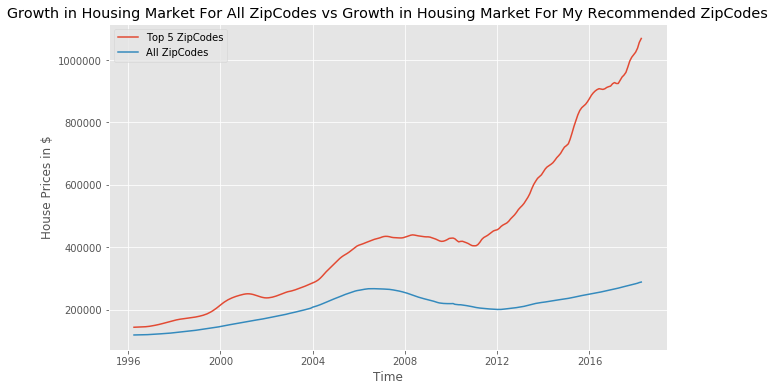

In [22]:
plt.figure(figsize=(10,6))
plt.plot(melted_top5.index, melted_top5.values, label='Top 5 ZipCodes')
plt.plot(melted_orig.index, melted_orig.values, label='All ZipCodes')
plt.xlabel('Time')
plt.ylabel('House Prices in $')
plt.title('Growth in Housing Market For All ZipCodes vs Growth in Housing Market For My Recommended ZipCodes')
plt.legend()
plt.show()

- Graph Showing Exactly How Much the best zipcodes outperform the average zipcode in our 3 metrics

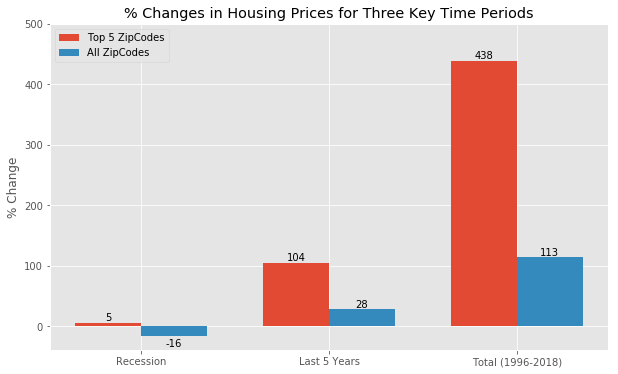

In [23]:
N = 3
top5_medians = top5_df[top5_df.columns[5:8]].median().values
all_medians = df[df.columns[5:8]].median().values

ind = np.arange(N) 
width = 0.35 

plt.figure(figsize=(10,6))
bars1 = plt.bar(ind, top5_medians, width, label='Top 5 ZipCodes')
bars2 = plt.bar(ind + width, all_medians, width,
    label='All ZipCodes')

for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
for rect in bars2:
    height = rect.get_height()
    if(height<0):
        plt.text(rect.get_x() + rect.get_width()/2.0, height-20, '%d' % int(height), ha='center', va='bottom')
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.ylabel('% Change')
plt.title('% Changes in Housing Prices for Three Key Time Periods')

plt.xticks(ind + width / 2, ('Recession', 'Last 5 Years', 'Total (1996-2018)'))
plt.ylim(top=500)
plt.legend(loc='best')
plt.show()

# Step 5 - Modeling

### Create Model

- Set up combinations of parameters so we can find the best fit for our model

In [24]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0,4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

- Create test variable for modelling that makes tweaking data input a 1 line code change instead of many

In [25]:
test = melted_top5

- Train models using SARIMAX with all possible parameter combinations and record the AIC score of each model

In [26]:
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(test,
                                        order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue

- Show the model with the lowest AIC score

In [27]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (2, 3, 2)
aic      4712.11
Name: 28, dtype: object

- Use the chosen parameters to fit the model we will now use for forecasting
- Show significance of each feature

In [28]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(test,
                                order=(2, 3, 2))

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2460      0.057     21.755      0.000       1.134       1.358
ar.L2         -0.4186      0.036    -11.540      0.000      -0.490      -0.347
ma.L1         -1.8919      0.051    -37.243      0.000      -1.991      -1.792
ma.L2          0.8933      0.050     17.793      0.000       0.795       0.992
sigma2      3.534e+06   4.83e-09   7.32e+14      0.000    3.53e+06    3.53e+06


### Validate Model

- Do a One-Step Ahead Forecast from 2014-on to test our model's forecasting abilities
- Plot comparison 

In [29]:
pred = output.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_conf = pred.conf_int()

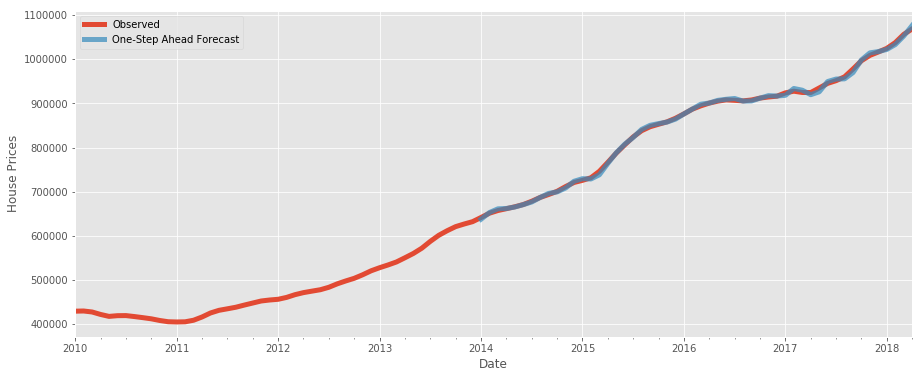

In [30]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = test['2010':].plot(lw=5)

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, lw=5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','One-Step Ahead Forecast'])

plt.show()

- Do a Dynamic Forecast from 2014-on to even further (and more realistically) gauge the accuracy of our model's predictions
- Plot comparison

In [31]:
# Get dynamic predictions with confidence intervals 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

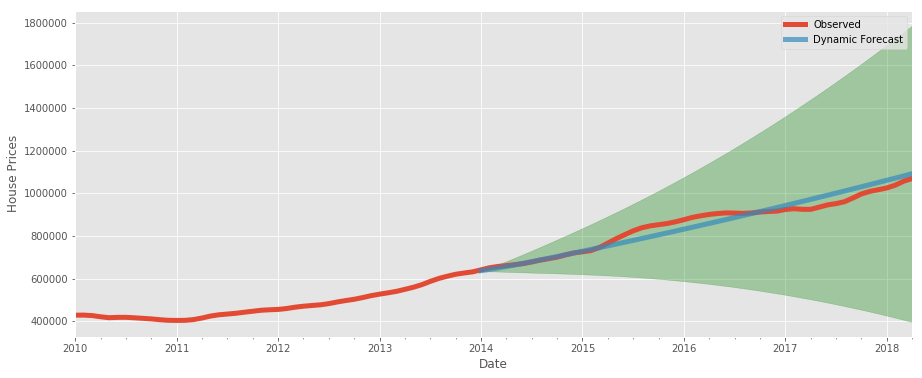

In [32]:
ax = test['2010':].plot(lw=5)
pred_dynamic.predicted_mean.plot(lw=5, ax=ax, alpha=.7)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','Dynamic Forecast'])

plt.show()

### Forecast

- Get Forecasts for 3 years (36 months)
- Get Confidence Intervals
- Plot Entire Time Series plus Forecast

In [33]:
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

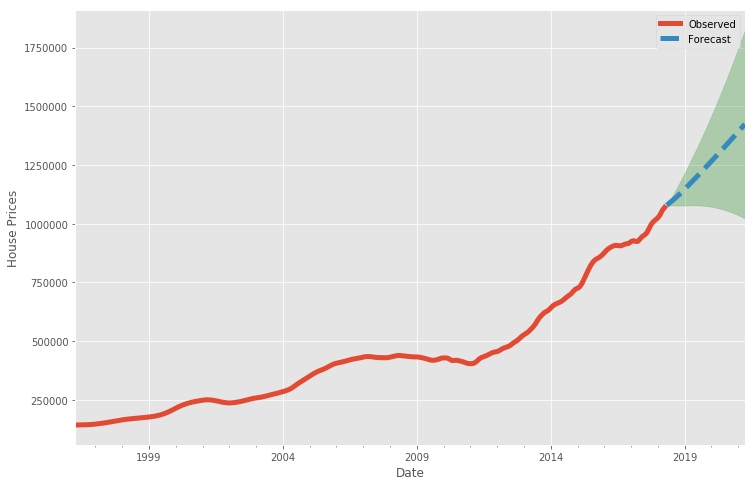

In [34]:
ax = test.plot(lw=5, figsize=(12,8))
prediction.predicted_mean.plot(ax=ax, lw=5, ls='--')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','Forecast'])

plt.show()

In [35]:
forecasted_3yr_pct_chg_recs = (prediction.predicted_mean[-1] - prediction.predicted_mean[0])/prediction.predicted_mean[-1]*100
forecasted_3yr_pct_chg_recs = round(forecasted_3yr_pct_chg_recs,1)

### Quick Second Model For Comparison

In [36]:
test2 = melted_orig

In [37]:
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(test2,
                                        order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
        
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (0, 2, 1)
aic      3719.93
Name: 6, dtype: object

In [38]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(test2,
                                order=(0, 2, 1))

output = ARIMA_MODEL.fit()

In [39]:
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

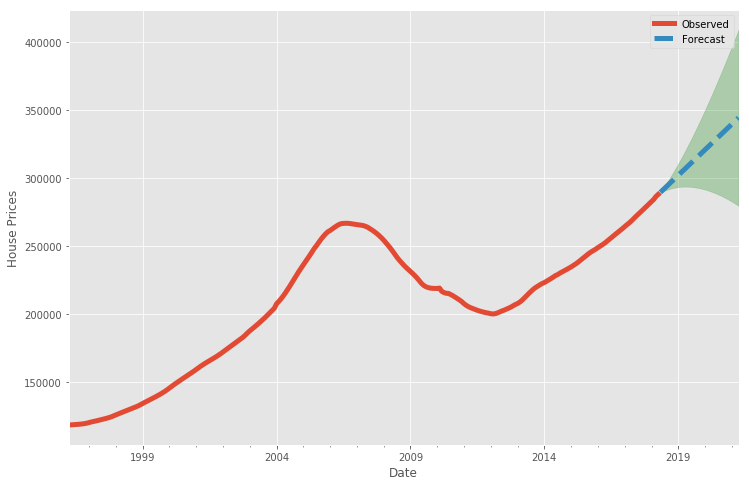

In [40]:
ax = test2.plot(lw=5, figsize=(12,8))
prediction.predicted_mean.plot(ax=ax, lw=5, ls='--')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','Forecast'])

plt.show()

### Chart Showing Difference in Growth Based On Forecasting (Top 5 vs. Average)

In [41]:
forecasted_3yr_pct_chg_orig = (prediction.predicted_mean[-1] - prediction.predicted_mean[0])/prediction.predicted_mean[-1]*100
forecasted_3yr_pct_chg_orig = round(forecasted_3yr_pct_chg_orig,1)
forecasted_3yr_pct_chg_orig

15.9

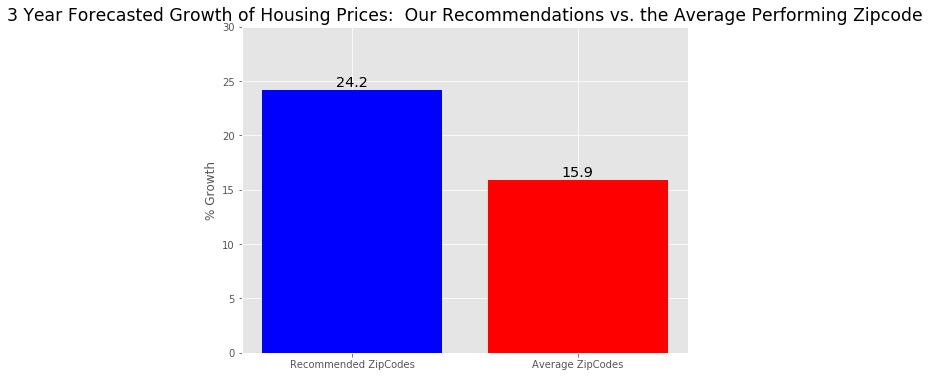

In [62]:
plt.figure(figsize=(8,6))
bars = plt.bar(['Recommended ZipCodes', 'Average ZipCodes'], [24.2, 15.9], color=['b', 'r'])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size='x-large')
plt.title("3 Year Forecasted Growth of Housing Prices:  Our Recommendations vs. the Average Performing Zipcode", 
          size='xx-large')
plt.ylabel('% Growth')
plt.ylim(0,30)
plt.show()